# GARCH model

In [1]:
import numpy as np
import pandas as pd
import arch as arch
from pathlib import Path
%matplotlib inline

In [2]:
csvpath = Path('Export Files/MSFT_data.csv')
stock_df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,28.049999,28.18,27.920000,27.98,22.143803,53443800
2011-01-04,27.940001,28.17,27.850000,28.09,22.230862,54405600
2011-01-05,27.900000,28.01,27.770000,28.00,22.159628,58998700
2011-01-06,28.040001,28.85,27.860001,28.82,22.808588,88026300
2011-01-07,28.639999,28.74,28.250000,28.60,22.634483,73762000


<AxesSubplot:xlabel='Date'>

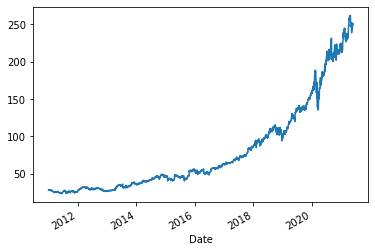

In [3]:
stock_df.Close.plot()

<AxesSubplot:xlabel='Date'>

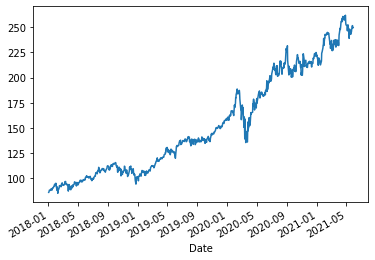

In [4]:
stock_df.loc['2018':'2021'].Close.plot()

<AxesSubplot:xlabel='Date'>

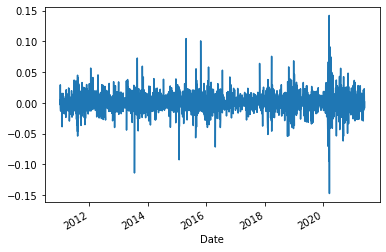

In [5]:
# GARCH assumes stationarity
# Clustering of volatility seen, e.g. 2008-2010
stock_df['Close'].pct_change().plot()

In [6]:
# Focus on the 2018-2021
returns = stock_df.loc['2019':'2021'].Close.pct_change() * 100
returns = returns.dropna()
returns.head()

Date
2019-01-03   -3.678799
2019-01-04    4.650923
2019-01-07    0.127536
2019-01-08    0.725069
2019-01-09    1.429955
Name: Close, dtype: float64

## GARCH

In [7]:
from arch import arch_model

In [8]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)

In [9]:
# Fit the GARCH Model
res = model.fit(disp="off")

In [10]:
# Summarize the model results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -1151.44
Distribution:                  Normal   AIC:                           2308.88
Method:            Maximum Likelihood   BIC:                           2322.10
                                        No. Observations:                  606
Date:                Wed, Jun 09 2021   Df Residuals:                      603
Time:                        21:22:49   Df Model:                            3
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1476  5.957e-02      2.478  1.321e-02 [3.087e-02,  0.264]
alpha[1]       0.1886  4.324e-02      4.363  1.286e-05   [  0.104,  0.273]
beta[1]        0.7706  4.597e-02     16.765  4.415e-63   [  0.681,  0.861]
==========================================================================

Covariance estimator: robust
"""

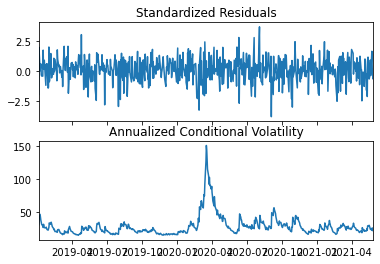

In [11]:
# Plot the model estimate of annualized volatility
fig = res.plot(annualize='D')

### Forecasting from GARCH

In [12]:
# Construct Volatility Forecasts for the next 3 days
forecast_horizon = 3
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = res.forecast(start='2021-05-28', horizon=forecast_horizon)
forecasts

In [13]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3
Date,,,
2021-05-28,19.177115,19.74781,20.28016


### Visualizing the forecast

In [14]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
final = intermediate.dropna().T
final

Date,2021-05-28
h.1,19.177115
h.2,19.747810
h.3,20.280160


<AxesSubplot:>

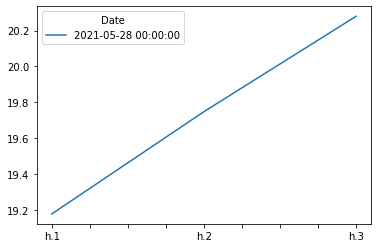

In [15]:
final.plot()